# DTSA-5510 Unsupervised Algorithms in Machine Learning - Final Project

In this project, I'm doing an analysis of bird songs based on the [bird song data set](https://www.kaggle.com/datasets/vinayshanbhag/bird-song-data-set) available on Kaggle. This data set consists of 9110 .wav audio files of bird song recordings from 5 different bird species. I will be using spectral audio processing libraries along with dimensionality reduction and clustering algorithms to build an unsupervised model for categorizing the bird songs by species.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

We'll begin by importing and inspecting the metadata from the data set.

In [3]:
metadata_df = pd.read_csv('./data/bird_songs_metadata.csv')
metadata_df

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-8.wav
5418,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-10.wav
5419,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-14.wav
5420,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-15.wav


Doing a count of the different bird species, we see the 5 species are fairly well-balanced in this data set.

In [8]:
metadata_df['species'].value_counts()

species
melodia        1256
polyglottos    1182
cardinalis     1074
migratorius    1017
bewickii        893
Name: count, dtype: int64

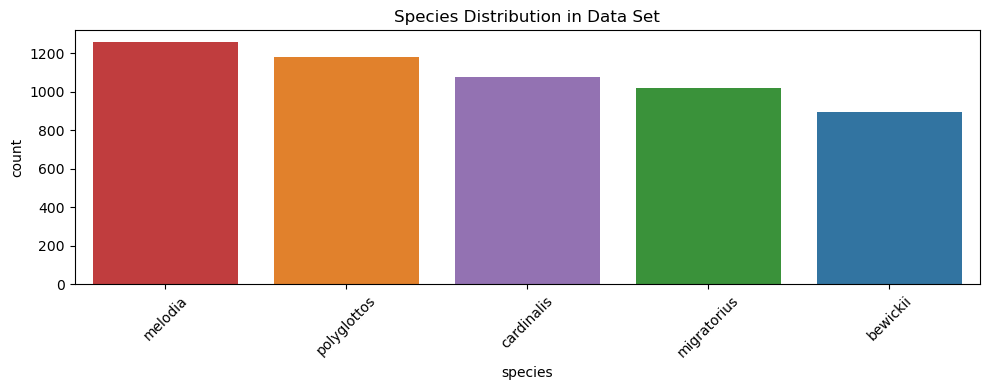

In [33]:
plt.figure(figsize=(10, 4))
sns.countplot(data=metadata_df, x="species", order=metadata_df['species'].value_counts().index, hue='species')
plt.title("Species Distribution in Data Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The recordings were made at quite a few different locations (304).

In [38]:
metadata_df['location'].nunique()

304

There are several locations where a disproportionate number of recordings were made.

In [28]:
metadata_df['location'].value_counts().head(20)

location
San Bernardino National Wildlife Refuge, Cochise County, Arizona              252
Hendrix Habitat - Fairview, Williamson County, Tennessee                      195
San Simon Cienega, Cochise County, Arizona                                     94
Sewanee, Franklin County, Tennessee                                            85
Knoxville, Tennessee                                                           74
Oso Flaco Lake, Nipomo, California                                             73
Bill Williams River NWR, Arizona                                               66
FR 42, Upper Cave Creek Canyon, Cochise County, Arizona                        57
Foothills Road, Cochise County, Arizona                                        56
Nome, Nome, Alaska                                                             54
Point Loma, San Diego, California                                              53
Stateline Road, Rodeo, New Mexico                                              46
Oxford,

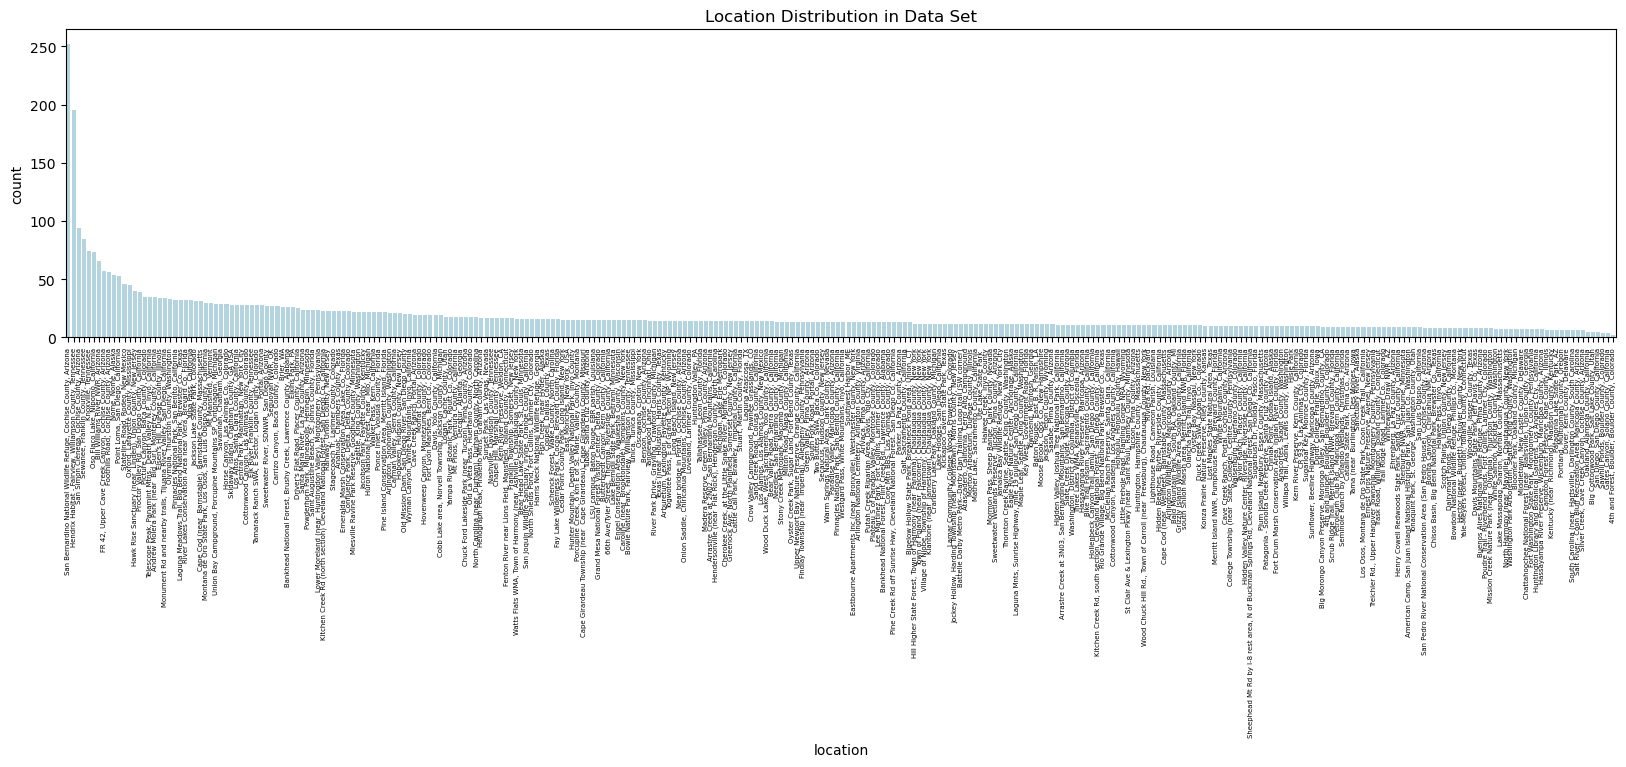

In [23]:
plt.figure(figsize=(20, 4))
sns.countplot(data=metadata_df, x="location", order=metadata_df['location'].value_counts().index, color='lightblue')
plt.title("Location Distribution in Data Set")
plt.xticks(rotation=90, fontsize=5)
plt.show()

Within the 5 species of birds are 28 subspecies.

In [32]:
metadata_df['subspecies'].nunique()

28

In [45]:
subspecies_counts = metadata_df.groupby(['species', 'subspecies']).size().reset_index(name='count')
subspecies_counts

,species,subspecies,count
0,bewickii,calophonus,40
1,bewickii,charienturus,58
2,bewickii,charienturus?,24
3,bewickii,eremophilus,135
4,cardinalis,cardinalis,52
5,cardinalis,floridanus,61
6,cardinalis,superbus,70
7,melodia,atlantica,14
8,melodia,clementae?,9
9,melodia,fallax,272


Seeing how the subspecies are distributed amongst species, melodia has a disproportionate number of subspecies.

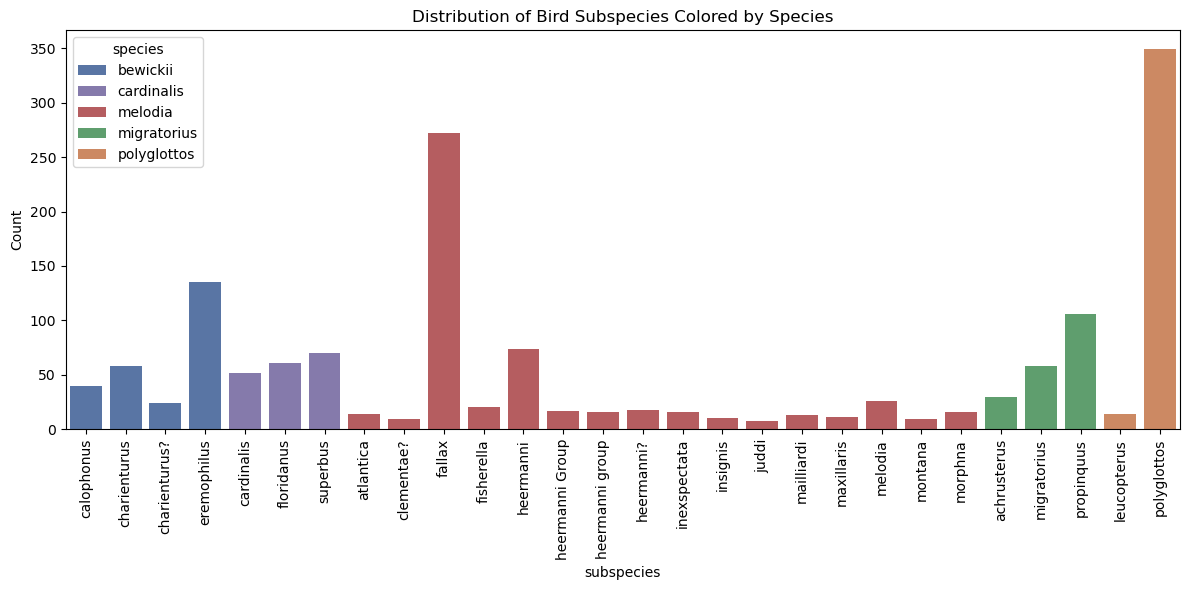

In [53]:
default_colors = sns.color_palette('deep')
species_palette = {
    'melodia': default_colors[3],
    'polyglottos': default_colors[1],
    'cardinalis': default_colors[4],
    'migratorius': default_colors[2],
    'bewickii': default_colors[0]
}

plt.figure(figsize=(12, 6))
sns.barplot(data=subspecies_counts, x='subspecies', y='count', hue='species', dodge=False, palette=species_palette)
plt.xticks(rotation=90)
plt.title("Distribution of Bird Subspecies Colored by Species")
plt.xlabel("subspecies")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Audio Pre-Processing

Now we'll begin importing and processing the 9910 audio files using the [librosa](https://librosa.org/) python library.

In [ ]:
import librosa
import librosa.display